# Worm-eating Warbler Occurrence Records Summary
This notebook is a tool for exploring data sets requested from GBIF (and eventually other sources), and mostly for developing criteria for filtering records (filter sets).  When the entire notebook is run, it retrieves records according to the filter sets specified and saves the results (records and some summary tables) in an sqlite database.  Some information is pulled from the parameters.sqlite database that is saved in this repository.

### General Setup

In [2]:
%matplotlib inline
import sqlite3
import pprint
import json
import pandas as pd
import numpy as np
#import geopandas as gpd
pd.set_option('display.width', 600)
pd.set_option('display.max_colwidth', 60)
pd.set_option('display.max_rows', 150)
from IPython.display import Image
from pygbif import occurrences
import matplotlib.pyplot as plt
import os
from datetime import datetime
t1 = datetime.now()
import repo_functions as functions

### Set Variables
Fill out stuff in this cell.

In [3]:
species_id = 'bwewax0'
summary_name = 'BigWormie'
gbif_req_id = 'GBIFr18'
gbif_filter_id = 'GBIFf7'
workDir = '/Users/nmtarr/Documents/Occurrence_Records/'
codeDir = '/Users/nmtarr/Code/occurrence-records-wrangler/'
inDir = workDir + 'Inputs/'
outDir = workDir + 'Outputs/'
default_coordUncertainty = 1000
SRID_dict = {'WGS84': 4326, 'AlbersNAD83': 102008} # Used in file names for output.
spdb = outDir + species_id + gbif_req_id + gbif_filter_id + '.sqlite'

print("Notebook run " + str(t1))

Notebook run 2019-09-05 16:14:50.959460


In [4]:
connjup = sqlite3.connect(codeDir + 'parameters.sqlite')
cursorjup = connjup.cursor()

# Get some variables
years = connjup.execute("""SELECT years_range 
                           FROM gbif_requests WHERE request_id = '{0}'""".format(gbif_req_id)).fetchone()[0]
gap_id = connjup.execute("""SELECT gap_id
                            FROM species_concepts WHERE species_id = '{0}'""".format(species_id)).fetchone()[0]
common_name = connjup.execute("""SELECT common_name
                                 FROM species_concepts WHERE species_id = '{0}'""".format(species_id)).fetchone()[0]

# Species Concept
Display information on the species from the parameters.sqlite database.

In [5]:
vals = cursorjup.execute("SELECT * FROM species_concepts WHERE species_id = '{0}';".format(species_id)).fetchall()[0]
cols = [x[1] for x in cursorjup.execute("PRAGMA table_info('species_concepts')").fetchall()]
pprint.pprint(dict(zip(cols, vals)))

{'bcb_id': None,
 'breeding_months': '5,6,7',
 'common_name': 'worm-eating warbler',
 'detection_distance_meters': 200,
 'end_year': None,
 'error_tolerance': 20,
 'fws_id': '',
 'gap_id': 'bwewax',
 'gbif_id': '2489603',
 'geometry': None,
 'itis_tsn': '726195',
 'migratory': '1',
 'notes': 'Species name changed from vermivorus in 2003.  Breeding and '
          'wintering months from Birds of North America Database (July 26, '
          '2019).  Migration is possible in early May and late July. N. Tarr '
          '26 July 2019.',
 'pad': 1,
 'scientific_name': 'Helmitheros vermivorum',
 'species_id': 'bwewax0',
 'start_year': 2003,
 'wintering_months': '10,11,12,1,2'}


## Filters
Display the parameters of the request filter set.  These are deployed during the step where records are retrieved from the API.

In [6]:
df1 = pd.read_sql_query(sql="SELECT * FROM gbif_requests WHERE request_id = '{0}'".format(gbif_req_id), con=connjup)
print("THE REQUEST FILTER SET")
print(df1.loc[0])

THE REQUEST FILTER SET
request_id                                                      GBIFr18
source                                                             GBIF
lat_range                                                         27,41
lon_range                                                       -91,-75
years_range                                                   2000,2002
months_range                                                       1,12
geoissue                                                           None
coordinate                                                         True
continent                                                          None
creator                                                         N. Tarr
notes           Like GBIF 14, but less restrictive.  For TWS 2019 talk.
Name: 0, dtype: object


Display the parameters of the post-request filter set.  These are deployed after the records are retrieved from the API, but before they are stored in the occurrence record sqlite database.

In [7]:
df2 = pd.read_sql_query(sql="SELECT * FROM gbif_filters WHERE filter_id = '{0}'".format(gbif_filter_id), con=connjup)
print("THE POST REQUEST FILTER SET")
print(df2.loc[0])

THE POST REQUEST FILTER SET
filter_id                                               GBIFf7
dataset                                                   GBIF
collection_codes_omit                                         
institutions_omit                                             
has_coordinate_uncertainty                                   0
max_coordinate_uncertainty                              200000
bases_omit                                                    
protocols_omit                                                
sampling_protocols_omit                                       
issues_omit                                                   
creator                                                N. Tarr
notes                         Let (nearly) everything through.
Name: 0, dtype: object


### Filter set justification
default_coord_uncertainty: Return as many as possible.

years_range: Return as many as possible.

months_range: Return as many as possible.

geoissue: Return as many as possible.

coordinate: Return as many as possible.

continent: Return as many as possible.

collection_codes_omit: Return as many as possible.

institutions_omit: Return as many as possible.

has_coordinate_uncertainty: Return as many as possible.

max_coordinate_uncertainty: Return as many as possible.

bases_omit: Return as many as possible.

protocols_omit:Return as many as possible.

sampling_protocols_omit: Return as many as possible.

issues_omit:Return as many as possible.

In [8]:
functions.retrieve_gbif_occurrences(codeDir, species_id, inDir, spdb, gbif_req_id, gbif_filter_id, 
                                    default_coordUncertainty, SRID_dict, outDir, summary_name)

relaxed
downloading https://www.sciencebase.gov/catalog/file/get/59f5ebb4e4b063d5d307e0d1?f=__disk__1c%2F00%2F75%2F1c00755f339c97bafe6c9d1c69ee14cef5326d7c to /Users/nmtarr/Documents/Occurrence_Records/Inputs/bWEWAx_CONUS_Range_2001v1.zip
downloading https://www.sciencebase.gov/catalog/file/get/59f5ebb4e4b063d5d307e0d1?f=__disk__7c%2F1d%2Fc7%2F7c1dc7208c25d4ed06614642f32dbac70c2aa2d5 to /Users/nmtarr/Documents/Occurrence_Records/Inputs/bWEWAx_CONUS_Range_2001v1.xml
/Users/nmtarr/Documents/Occurrence_Records/Outputs/bwewax0GBIFr18GBIFf7.sqlite

3597 records exist with the request parameters

Records saved in /Users/nmtarr/Documents/Occurrence_Records/Outputs/bwewax0GBIFr18GBIFf7.sqlite


### How many records made it through the filters?
This is the number that was actually saved in the occurrence record sqlite database.

In [9]:
conn_occ= sqlite3.connect(spdb)
curs_occ = conn_occ.cursor()
record_count = curs_occ.execute("SELECT COUNT(occ_id) FROM occurrences WHERE species_id = '{0}'".format(species_id)).fetchone()
print(str(record_count[0]) + " records")

3597 records


### Were there duplicate records?
needs to be addressed

In [10]:
dups0 = curs_occ.execute("SELECT COUNT(occ_id) FROM occurrences GROUP BY geom_xy4326, occurrenceDate;").fetchall()
dups1 = [x[0] for x in dups0]
dups2 = [x for x in dups1 if x > 1]
print(str(len(dups2)) + ' records were duplicates based on xy coordinate and date-time')

337 records were duplicates based on xy coordinate and date-time


# Institutions
#### Pre-filters

In [11]:
institutions = curs_occ.execute("SELECT value, count FROM post_request_value_counts WHERE attribute = 'institutions';").fetchall()
for x in institutions:
    print(x[0] + " ({0})".format(x[1]))

CLO (3514)
1 (9)
http://grbio.org/cool/iakn-125z (9)
http://biocol.org/urn:lsid:biocol.org:col:34795 (6)
15 (8)
ECOSUR-SC (8)
urn:lsid:biocol.org:col:34878 (4)
unknown (2)
UAM (14)
188 (2)
urn:lsid:biocol.org:col:34939 (4)
16 (1)
819004460-4 (15)
CRBO (1)


#### Post-filter

In [12]:
institutions = curs_occ.execute("SELECT vals FROM record_attributes WHERE field = 'institutions' AND step = 'filter';").fetchone()[0]
institutions = institutions.replace('[', '').strip().replace(']', '').replace("'", "")
institutions = institutions.split(',')
for ins in institutions:
    print(ins.strip())

UWBM
Red Nacional de Observadores de Aves (RNOA)
NO DISPONIBLE
UNKNOWN
ECOSUR
MBM-UACAM
UAM
CLO
ECOSUR-SC
CRBO
KU
FMNH


# Collections
#### Pre-filters

In [13]:
collections = curs_occ.execute("SELECT value, count FROM post_request_value_counts WHERE attribute = 'collections';").fetchall()
for x in collections:
    print(x[0] + " ({0})".format(x[1]))

EBIRD (3183)
NO APLICA (9)
Birds (15)
EBIRD_CAMERICA (25)
EBIRD_MEX (16)
EBIRD_TX (157)
EBIRD_CAN (50)
EBIRD_AK (3)
ECO-SC-A (8)
ECO-SC-MO (8)
EBIRD_QC (5)
Bird (4)
EBIRD_NJ (26)
EBIRD_VA (10)
EBIRD_PA (23)
EBIRD_VINS (2)
UNKNOWN (2)
Bird specimens (14)
EBIRD_LWBA (2)
MBM (2)
GBBC (1)
ML (4)
EBIRD_PNW (1)
ECO-CH-A (1)
EBIRD_WI (6)
EBIRD_BCN (1)
AVES (15)
EBIRD_MO (1)
EBIRD_CB (1)
CRBO (1)
EBIRD_PR (1)


#### Post-filters

In [14]:
collections = curs_occ.execute("SELECT vals FROM record_attributes WHERE field = 'collections' AND step = 'filter';").fetchone()[0]
collections = collections.replace('[', '').strip().replace(']', '').replace("'", "")
collections = collections.split(',')
for colls in collections:
    print(colls.strip())

ML
Bird specimens
ECO-CH-A
EBIRD_WI
EBIRD_CB
CRBO
GBBC
NO APLICA
EBIRD_PA
EBIRD_AK
EBIRD_VA
EBIRD_QC
Bird
EBIRD_CAMERICA
Birds
EBIRD_BCN
ECO-SC-MO
EBIRD
EBIRD_CAN
EBIRD_VINS
EBIRD_PR
EBIRD_TX
MBM
ECO-SC-A
EBIRD_MO
AVES
EBIRD_LWBA
EBIRD_MEX
EBIRD_PNW
EBIRD_NJ


# Bases
#### Pre-filter

In [15]:
bases = curs_occ.execute("SELECT value, count FROM post_request_value_counts WHERE attribute = 'bases';").fetchall()
for x in bases:
    print(x[0] + " ({0})".format(x[1]))

HUMAN_OBSERVATION (3546)
PRESERVED_SPECIMEN (37)
LITERATURE (8)
UNKNOWN (1)
OBSERVATION (1)
MACHINE_OBSERVATION (4)


#### Post-filters

In [16]:
bases = curs_occ.execute("SELECT vals FROM record_attributes WHERE field = 'bases' AND step = 'filter';").fetchone()[0]
bases = bases.replace('[', '').strip().replace(']', '').replace("'", "")
bases = bases.split(",")
for bas in bases:
    print(bas.strip())

HUMAN_OBSERVATION
OBSERVATION
UNKNOWN
LITERATURE
MACHINE_OBSERVATION
PRESERVED_SPECIMEN


# Protocols
#### Pre-filters

In [17]:
protocols = curs_occ.execute("SELECT value, count FROM post_request_value_counts WHERE attribute = 'protocols';").fetchall()
for x in protocols:
    print(x[0] + " ({0})".format(x[1]))

DWC_ARCHIVE (3589)
DIGIR (8)


#### Post-filters

In [18]:
protos = curs_occ.execute("SELECT vals FROM record_attributes WHERE field = 'protocols' AND step = 'filter';").fetchall()[0]
for pro in protos:
    pro = pro.replace('[', '').strip().replace(']', '').replace("'", "")
    print(pro)

DWC_ARCHIVE, Directa, Red de Niebla, DIGIR


# Issues
#### Pre-filters

In [19]:
issues = curs_occ.execute("SELECT value, count FROM post_request_value_counts WHERE attribute = 'issues';").fetchall()
for x in issues:
    print(x[0] + " ({0})".format(x[1]))

COORDINATE_ROUNDED (2617)
GEODETIC_DATUM_ASSUMED_WGS84 (53)
ELEVATION_MIN_MAX_SWAPPED (10)
COUNTRY_DERIVED_FROM_COORDINATES (15)
TAXON_MATCH_FUZZY (33)
TAXON_MATCH_HIGHERRANK (16)


#### Post-filters

In [20]:
issues = curs_occ.execute("SELECT vals FROM record_attributes WHERE field = 'issues' AND step = 'filter';").fetchone()[0]
issues = issues.replace('[', '').strip().replace(']', '').replace("'", "")
issues = issues.split(',')
for iss in issues:
    print(iss.strip())

ELEVATION_MIN_MAX_SWAPPED
COORDINATE_ROUNDED
TAXON_MATCH_FUZZY
TAXON_MATCH_HIGHERRANK
GEODETIC_DATUM_ASSUMED_WGS84
COUNTRY_DERIVED_FROM_COORDINATES


# Descriptions of filtered records

### Locations

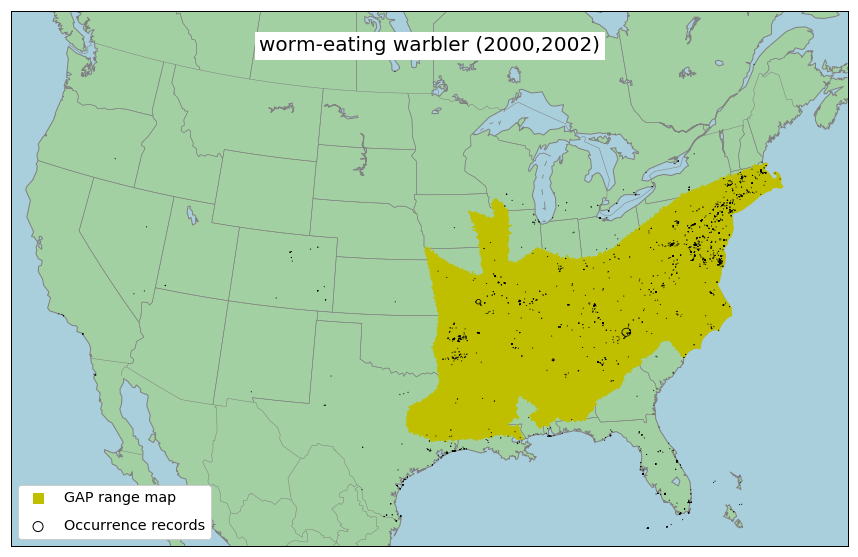

In [21]:
gap_range2 = "{0}{1}_range_4326".format(inDir, gap_id)

shp1 = {'file': gap_range2, 'column': None, 'alias': 'GAP range map',
        'drawbounds': False, 'linewidth': .5, 'linecolor': 'y',
        'fillcolor': 'y', 'marker':'s'}

shp2 = {'file': '{0}{1}_circles'.format(outDir, summary_name), 'column': None,
        'alias': 'Occurrence records', 'drawbounds': True, 'linewidth': .75, 'linecolor': 'k',
        'fillcolor': None, 'marker':'o'}

# Display occurrence polygons
if os.path.isfile(gap_range2 + ".shp"):
    map_these=[shp1, shp2]
else:
    map_these=[shp2]
    
title="{1} ({0})".format(years, common_name)
functions.MapShapefilePolygons(map_these=map_these, title=title)

### Years represented

Text(0.5, 1.0, 'Occurrences per Year')

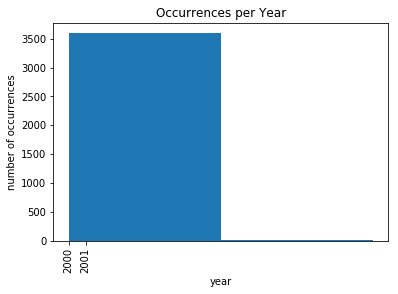

In [22]:
occ_years = [int(x[0]) for x in curs_occ.execute("SELECT strftime('%Y', occurrenceDate) FROM occurrences").fetchall()]
years = connjup.execute("SELECT years_range FROM gbif_requests WHERE request_id = '{0}'".format(gbif_req_id)).fetchone()[0]
years = years.split(',')
yearsrng = list(range(int(years[0]), int(years[1]), 1))
binsnum = int(years[1]) - int(years[0])
plt.hist(occ_years, bins=binsnum)
plt.ylabel("number of occurrences")
plt.xlabel("year")
plt.xticks(yearsrng, rotation=90)
plt.title("Occurrences per Year")

### Months represented

Text(0.5, 1.0, 'Occurrences per Month')

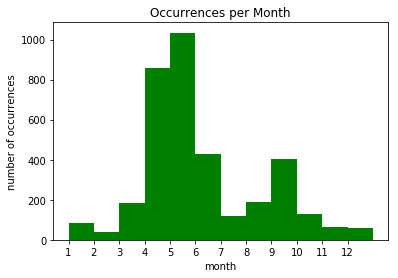

In [23]:
occ_months = [int(x[0]) for x in curs_occ.execute("SELECT strftime('%m', occurrenceDate) FROM occurrences").fetchall()]
plt.hist(occ_months, bins=range(1, 14), color="g")
plt.ylabel("number of occurrences")
plt.xlabel("month")
plt.xticks(range(1, 13))
plt.title("Occurrences per Month")

### Distribution of coordinate uncertainty values

Text(0.5, 1.0, 'Coordinate Uncertainty')

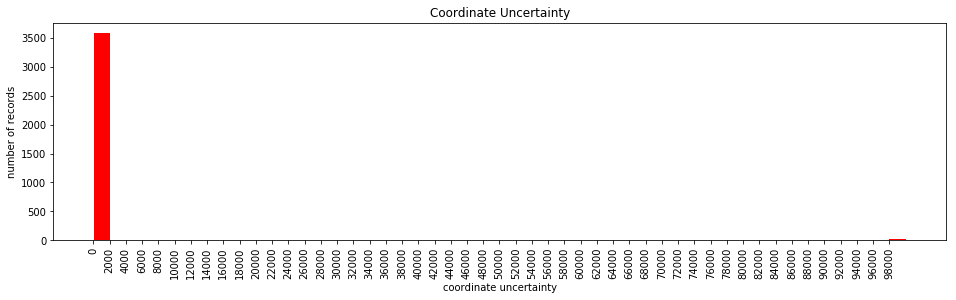

In [24]:
occ_cert = [int(x[0]) for x in curs_occ.execute("SELECT coordinateUncertaintyInMeters FROM occurrences").fetchall()]
maxi = np.max(occ_cert)
plt.figure(figsize=(16,4))
plt.hist(occ_cert, bins=50, color="r")
plt.xticks(range(0, maxi, int(maxi/50)), rotation=90)
plt.ylabel("number of records")
plt.xlabel("coordinate uncertainty")
plt.title("Coordinate Uncertainty")

Text(0.5, 1.0, 'Coordinate Uncertainty')

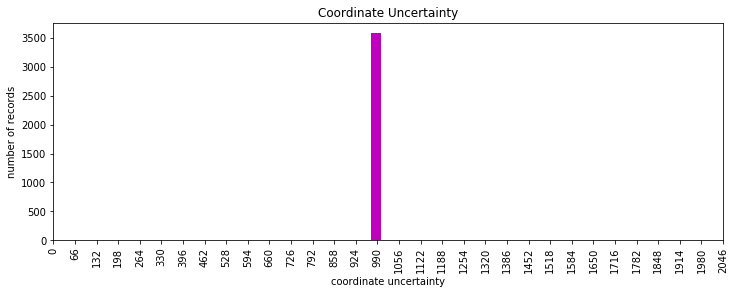

In [25]:
rng_max = 2000
occ_cert2 = [x for x in occ_cert if x <= rng_max]
plt.figure(figsize=(12,4))
plt.hist(occ_cert2, bins=30, color="m", align='mid')
plt.xticks(range(0, rng_max + 100, int(rng_max/30.)), rotation=90)
plt.ylabel("number of records")
plt.xlabel("coordinate uncertainty")
plt.title("Coordinate Uncertainty")

### Geodetic datums present

In [26]:
datums = curs_occ.execute("SELECT vals FROM record_attributes WHERE field = 'datums' AND step = 'filter';").fetchone()[0]
datums = datums.replace('[', '').strip().replace(']', '').replace("'", "")
datums = datums.split()
for datum in datums:
    print(datum)

WGS84


### Establishment means reported

In [27]:
establishment = curs_occ.execute("SELECT vals FROM record_attributes WHERE field = 'establishment' AND step = 'filter';").fetchall()[0]
for est in establishment:
    est = est.replace('[', '').strip().replace(']', '').replace("'", "")
    print(est)

### Identification qualifiers included

In [28]:
quali = curs_occ.execute("SELECT DISTINCT vals FROM record_attributes WHERE field = 'IDqualifier' AND step = 'filter';").fetchall()[0]
for q in quali:
    q = q.replace('[', '').strip().replace(']', '').replace("'", "")
    print(q)

### Remarks included

In [29]:
remarks = curs_occ.execute("SELECT DISTINCT remarks FROM occurrences;").fetchall()
#remarks = remarks.replace('[', '').strip().replace(']', '').replace("'", "")
#remarks = remarks.split(',')
if len(remarks) <= 20:
    for rem in remarks:
        if rem[0][0:1] == ';':
            print(rem[0][2:])
        else:
            print(rem[0])
else:
    print("More than 20 remarks, consult the occurrence database.")

More than 20 remarks, consult the occurrence database.


### Sources

In [30]:
tables = cursorjup.execute("SELECT table_name FROM table_descriptions").fetchall()
tables = [x[0] for x in tables]

filter_sets = [gbif_req_id, gbif_filter_id]

sources = []
for s in filter_sets:
    s = s.strip()
    for tab in tables:
        columns = cursorjup.execute("SELECT column_name FROM column_descriptions WHERE table_name = '{0}'".format(tab)).fetchall()
        columns = [x[0] for x in columns]
        for col in columns:
            try:
                a = cursorjup.execute("SELECT source FROM {1} WHERE {2} = '{0}'".format(s, tab, col)).fetchone()[0]
                sources.append(a)
            except:
                pass
print(list(set(sources))[0])

GBIF


### Attributes returned for the records in the request (pre-filters)

In [31]:
fields_summary = pd.read_sql("SELECT * FROM gbif_fields_returned", conn_occ, index_col='index')
fields_summary.index.name = 'field'
print(fields_summary)

                                  included(n)  populated(n)
field                                                      
acceptedNameUsage                          20            20
acceptedScientificName                   3597          3597
acceptedTaxonKey                         3597          3597
accessRights                               57            57
associatedSequences                         2             2
basisOfRecord                            3597          3597
behavior                                    4             4
bibliographicCitation                      20            20
catalogNumber                            3596          3596
class                                    3597          3597
classKey                                 3597          3597
collectionCode                           3595          3595
collectionID                               53            53
continent                                  32            32
coordinateUncertaintyInMeters           

### Runtime

In [32]:
t2 = datetime.now()
print(t2 - t1)

0:04:46.506946
